# Лабораторная работа №2 
# Генерация систем непрерывных и дискретных случайных величин

In [1]:
f"Вариант {(75350035 - 1) % 9 + 1}"

'Вариант 1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def multiplicative_congruent_sensor(n=20, a0=19941994, k=(2**32)-5, m=2**64, float_round=8):
    assert a0 >= 0, "`a0` should not be negative"
    assert m >= 0, "`m` should not be negative"
    
    generated_nums = []
    next_a = a0
    for _ in range(n):
        next_a = (k * next_a) % m
        generated_nums.append(round(next_a / m, float_round))
    return generated_nums

In [4]:
def get_frequencies(x, k, n):
    step = max(x) / k
    arange = np.arange(min(x), max(x) + step, step)
    x_n = [0 for _ in range(k)]
    for index, (i, j) in enumerate(zip(arange, arange[1:])):
        for el in x:
            if i <= el <= j:
                x_n[index] += 1
    return arange, [i/n for i in x_n]

In [5]:
def draw_hist_plot(x_orig, y_orig, title="", is_plot_show=True):
    x = x_orig[:]
    y = y_orig[:]
    y.insert(0, 0)
    plt.step(x, y)
    plt.vlines(x, min(y), y, colors='C0')
    plt.grid(True)
    plt.suptitle(title, fontweight='bold')
    if is_plot_show:
        plt.show()
        
def draw_plot(x_orig, y_orig, plot_type="", title="", is_plot_show=True):
    x = x_orig[:]
    y = y_orig[:]
    plt.plot(x, y, plot_type)
    plt.grid(True)
    plt.suptitle(title, fontweight='bold')
    if is_plot_show:
        plt.show()

## Формирование двумерной НСВ

Функция плотности распределения:
$$ f(x, y) = e^{-x-y}, \forall x, y : 0 \leq x, y \leq \infty $$

In [6]:
def F(arg):
    return 1 - np.e ** (-arg)

def F_inv(arg):
    return -np.log(1 - arg)

def F_x(x):
    return F(x)

def F_inv_x(x):
    return F_inv(x)

def F_y(y):
    return F(y)

def F_inv_y(y):
    return F_inv(y)

def M_x(l=1):
    return l ** -1

def M_y(l=1):
    return l ** - 1

def Var_x(l=1):
    return l ** -2

def Var_y(l=1):
    return l ** -2

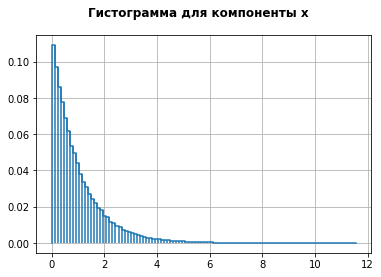

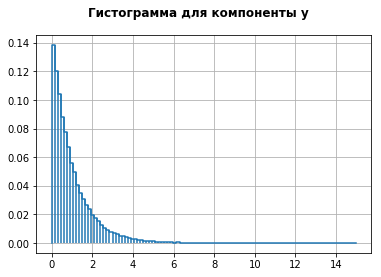

In [24]:
n = 100000
k = 100
p = [i for i in multiplicative_congruent_sensor(n=2*n)]

x1 = [F_inv_x(i) for i in p[::2]]
x1_0, y1_0 = get_frequencies(x1, k, n)
draw_hist_plot(x1_0, y1_0, title="Гистограмма для компоненты х")

x2 = [F_inv_y(i) for i in p[1::2]]
x2_0, y2_0 = get_frequencies(x2, k, n)
draw_hist_plot(x2_0, y2_0, title="Гистограмма для компоненты y")

In [25]:
def mathematical_expectation(x, n):
    return sum(x) / n

def variance(x, n):
    m = mathematical_expectation(x, n)
    return sum(i**2 - m for i in x) / (n-1)

from scipy.stats import chi2, t

def me_interval_estimation(variance, me, n, alpha=0.05):
    cof = np.sqrt(variance) * t.ppf(1 - alpha / 2, n - 1) / np.sqrt(n - 1)
    return me - cof, me + cof

def variance_interval_estimation(variance, n, alpha=0.05):
    left = n * variance / chi2.isf((1 - alpha) / 2, n - 1)
    right = n * variance / chi2.isf((1 + alpha) / 2, n - 1)
    return left, right

print("Точечная оценка мат. ожидания для x:", mathematical_expectation(x1, n))
print("Интервальная оценка мат. ожидания для x:", me_interval_estimation(variance(x1, n), mathematical_expectation(x1, n), n))
print("Теоретическое мат. ожидание для x:", M_x())
print("Точечная оценка дисперсии для x:", variance(x1, n))
print("Интервальная оценка дисперсии для x:", variance_interval_estimation(variance(x1, n), n))
print("Теоретическая дисперсия для x:", Var_x())
print("")
print("Точечная оценка мат. ожидания для y:", mathematical_expectation(x2, n))
print("Интервальная оценка мат. ожидания для x:", me_interval_estimation(variance(x2, n), mathematical_expectation(x2, n), n))
print("Теоретическое мат. ожидание для y:", M_y())
print("Точечная оценка дисперсии для y:", variance(x2, n))
print("Интервальная оценка дисперсии для x:", variance_interval_estimation(variance(x1, n), n))
print("Теоретическая дисперсия для y:", Var_y())

Точечная оценка мат. ожидания для x: 0.9999281774035511
Интервальная оценка мат. ожидания для x: (0.993716842980185, 1.0061395118269172)
Теоретическое мат. ожидание для x: 1.0
Точечная оценка дисперсии для x: 1.0042891876492355
Интервальная оценка дисперсии для x: (1.004024335768885, 1.0045876216881002)
Теоретическая дисперсия для x: 1.0

Точечная оценка мат. ожидания для y: 1.0012495974177018
Интервальная оценка мат. ожидания для x: (0.9950263157559841, 1.0074728790794196)
Теоретическое мат. ожидание для y: 1.0
Точечная оценка дисперсии для y: 1.0081563185316482
Интервальная оценка дисперсии для x: (1.004024335768885, 1.0045876216881002)
Теоретическая дисперсия для y: 1.0


In [9]:
def correlation_coefficient(x_o, y_o):
    x, y = x_o, y_o
    me_x = mathematical_expectation(x, len(x))
    me_y = mathematical_expectation(y, len(y))
    return sum((i-me_x)*(j-me_y) for i, j in zip(x, y)) / np.sqrt(sum((i-me_x)**2 for i in x) * sum((i-me_y)**2 for i in y))

In [10]:
print("Состоятельная оценка коэффициента корреляции:", correlation_coefficient(x1, x2))

Состоятельная оценка коэффициента корреляции: -0.003546027858964998


## Формирование двумерной ДСВ

В качестве закона распределения возьмем одновременное выпадение значений на двух игральных костях

In [11]:
X = [1, 2, 3, 4, 5, 6]
Y = [1, 2, 3, 4, 5, 6]
p_x = [1/6 for _ in range(len(X))]
p_y = [1/6 for _ in range(len(Y))]
P = [[round(i*j, 6) for j in p_y] for i in p_x]
print("Теоретический закон распределения:\n", np.matrix(P))

Теоретический закон распределения:
 [[0.027778 0.027778 0.027778 0.027778 0.027778 0.027778]
 [0.027778 0.027778 0.027778 0.027778 0.027778 0.027778]
 [0.027778 0.027778 0.027778 0.027778 0.027778 0.027778]
 [0.027778 0.027778 0.027778 0.027778 0.027778 0.027778]
 [0.027778 0.027778 0.027778 0.027778 0.027778 0.027778]
 [0.027778 0.027778 0.027778 0.027778 0.027778 0.027778]]


In [12]:
round(sum(sum(i) for i in P), 2)

1.0

In [13]:
def F_x(i):
    return sum(sum(P[j][k] for k in range(len(Y))) for j in range(i))

def F_y(m, k):
    return sum(P[k][j] / sum(P[k]) for j in range(m))

In [14]:
from collections import Counter

def get_counts(n):
    p = multiplicative_congruent_sensor(n=n)
    gen_x = []
    gen_y = []
    indicies_x = []
    indicies_y = []
    for ((i, _), (j, _)) in zip(enumerate(X), list(enumerate(X))[1:]):
        indicies_x.append((i, j))
    for ((i, _), (j, _)) in zip(enumerate(Y), list(enumerate(Y))[1:]):
        indicies_y.append((i, j))
    indicies_x.append((len(X)-1, len(X)))
    indicies_y.append((len(Y)-1, len(Y)))
    for i, j in indicies_x:
        for pv in p:
            if F_x(i) < pv <= F_x(j):
                gen_x.append(X[i])
                for k, m in indicies_y:
                    if F_y(k, i) < pv <= F_y(m, i):
                        gen_y.append(Y[i])
    return sorted(Counter(gen_x).most_common()), sorted(Counter(gen_y).most_common())

Эмпирическая матрица распределения:
 [[0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]]
Образует полную группу: 1.0
Maт. ожидание: 3.4964000000000004
Интервальная оценка мат. ожидания: (3.4630507802201436, 3.5297492197798572)
Теоретическое мaт. ожидание: 3.5
Дисперсия: 2.8941870399999967
Интервальная оценка дисперсии: (2.8921037847284587, 2.897238216253338)
Теоретическая дисперсия: 2.916666666666666


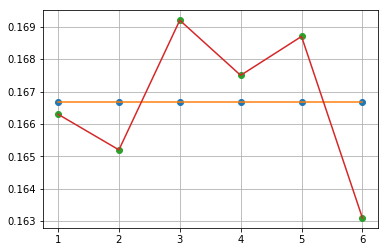

In [23]:
n = 10000
x_count, y_count = get_counts(n)
pe_x = [i/n for _, i in x_count]
pe_y = [i/n for _, i in y_count]
P_e = [[i*j for j in p_y] for i in p_x]
e_mtx = np.matrix(P_e)
print("Эмпирическая матрица распределения:\n", e_mtx)
print("Образует полную группу:", round(sum(sum(i) for i in P_e), 2))
print("Maт. ожидание:", sum(i*j for i, j in zip(X, pe_x)))
print("Интервальная оценка мат. ожидания:", 
      me_interval_estimation(
        sum(((i)**2 * j for i, j in zip(X, pe_x))) - (sum(i*j for i, j in zip(X, pe_x)))**2,
        sum(i*j for i, j in zip(X, pe_x)),
        n
      )
)
print("Теоретическое мaт. ожидание:", sum(i*j for i, j in zip(X, p_x)))
print("Дисперсия:", sum(((i)**2 * j for i, j in zip(X, pe_x))) - (sum(i*j for i, j in zip(X, pe_x)))**2)
print("Интервальная оценка дисперсии:", 
      variance_interval_estimation(
          sum(((i)**2 * j for i, j in zip(X, pe_x))) - (sum(i*j for i, j in zip(X, pe_x)))**2, 
          n
      )
)
print("Теоретическая дисперсия:", sum(((i)**2 * j for i, j in zip(X, p_x))) - (sum(i*j for i, j in zip(X, p_x)))**2)
x = X[:]
y = p_x[:]
plt.plot(x, y, "o")
plt.plot(x, y)
x = X[:]
y = pe_x[:]
plt.plot(x, y, "o")
plt.plot(x, y)
plt.grid(True)
plt.grid(True)
plt.show()